# Fitting of Simple Tomoraphy Data

## S-Matrix, Conditioning the Existence of the Loop

In this experiment, we create a pair of topological charges of varying flavour and then conditioned on the state of a control bit we apply a closed anyon loop enclosing one of the charges.
$$
    \ket{0} \rightarrow F^a_{s_1, s_2}\ket{GS} = \ket{s_1, s_2; a},
$$
 here $a$ labels the flavour of anyons created at sites $s_1$ and $s_2$.
 $$
     \frac{1}{\sqrt{2}}(\ket{c=0}+\ket{c=1})\ket{s_1, s_2; a} \rightarrow \frac
{1}{\sqrt{2}}(\ket{0}\ket{s_1, s_2; a}+\ket{1}F^b_{\partial S}\ket{s_1, s_2; a}), 
$$
 here $b$ labels the flavour of the second anyon and $\partial S$ is a loop enclosing a set $S \ni s_1$ (and $s_2 \notin S$).

 The applied loop doesn't change the charge content of the state, hence we can factorize out the matter degrees of freedom:
$$
   \frac
{1}{\sqrt{2}}(\ket{0}\ket{s_1, s_2; a}+\ket{1}F^b_{\partial S}\ket{s_1, s_2; a}) = \frac
{1}{\sqrt{2}}(\ket{0}\ket{s_1, s_2; a}+\ket{1}\tilde{S}_{ab}\ket{s_1, s_2; a}) = \frac
{1}{\sqrt{2}}(\ket{c=0}+\ket{c=1}\tilde{S}_{ab})\ket{s_1, s_2; a} 
$$
 where $\tilde{S}_{ab}$ is the normalized linking matrix element of the two anyon flavours, the value of which we extract by tomography.

In [86]:
# The Plotting procedure, Fitting and Stats

def func(x, a, b, c):
  return np.cos(x-a*np.pi)*b + c
import math

def plotting(mag=False, n_shots=1000):
  
  if mag:
    pols = pols_th
    angles = angles_th
  else:
    pols = pols_ph
    angles = angles_ph

  xerr = np.zeros(pols.size)
  yerr = np.sqrt(1+pols)*np.sqrt(1-pols)*np.sqrt(1/n_shots)
  args, cov = curve_fit(func, angles, pols)
  plt.figure(1)
  if args[1]<0:
    args[1] = - args[1]
    args[0] = np.mod(args[0]+1, 2)
    if args[0] > 1:
      args[0] -=2
  argerrs = [np.sqrt(cov[i][i]) for i in range(0, len(cov))]

  def round_by_err(x, x_err):
      round_to = -int(math.floor(math.log10(x_err)))
      x_err = round(x_err, round_to)
      x = round(x, round_to)
      if round_to == 0:
          x, x_err = int(x), int(x_err)
      return x, x_err

  a, a_err = round_by_err(args[0], argerrs[0])
  b, b_err = round_by_err(args[1], argerrs[1])
  c, c_err = round_by_err(args[2], argerrs[2])

  if mag:
    main = np.sqrt((1-np.cos(a*np.pi))/(1+np.cos(a*np.pi))) # |S|
    main_err = np.abs(a_err*np.pi*np.sin(a*np.pi)/(1+np.cos(a*np.pi))**2/main)
    main, main_err = round_by_err(main, main_err)
    label = "f(x)=b⋅cos(x-a)+c\na=({}±{})\u03C0\nb=({}±{})\nc=({}±{})\n|S|=({}±{})".format(a, a_err, b, b_err, c, c_err, main, main_err)
  else:
    main = a
    main_err = a_err
    main, main_err = round_by_err(main, main_err)
    label = "f(x)=b⋅cos(x-a)+c\na=({}±{})\u03C0\nb=({}±{})\nc=({}±{})\nargS=({}±{})\u03C0".format(a, a_err, b, b_err, c, c_err, main, main_err)

  print(label)
  plt.errorbar(angles/np.pi, pols, yerr=yerr, fmt=".")
  plt.plot(angles/np.pi, func(angles, *args), color='r')
  plt.ylabel('Polarization')
  if mag:
    plt.xlabel('\u03B8 [\u03C0 rad]')
  else:
    plt.xlabel('\u03C6 [\u03C0 rad]')

  return 0 


In [63]:
# @title S = + 1

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array([0.546, 0.538, 0.587, 0.532, 0.48,  0.468, 0.392, 0.416, 0.355, 0.32,  0.268, 0.254,
 0.149, 0.154, 0.13,  0.065, 0.075, 0.,    0.044, 0.009, 0.024, 0.067, 0.083, 0.,
 0.059, 0.093, 0.109, 0.189, 0.145, 0.218, 0.295, 0.31,  0.432, 0.341, 0.499, 0.457,
 0.485, 0.568, 0.535, 0.584])

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array([ 0.427,  0.417,  0.482,  0.588,  0.569 , 0.577 , 0.58 ,  0.597 , 0.569 , 0.558,
  0.545,  0.532,  0.519,  0.423 , 0.458 , 0.328  ,0.346 , 0.264 , 0.253 , 0.187,
  0.096,  0.104,  0.097, -0.067, -0.005 ,-0.076 ,-0.053, -0.009, -0.023 ,-0.01,
 -0.085,  0.009,  0.041,  0.106 , 0.11  , 0.224  ,0.15  , 0.34  , 0.336  ,0.398])



f(x)=b⋅cos(x-a)+c
a=(-0.007±0.008)π
b=(0.272±0.007)
c=(0.282±0.005)
argS=(-0.007±0.008)π


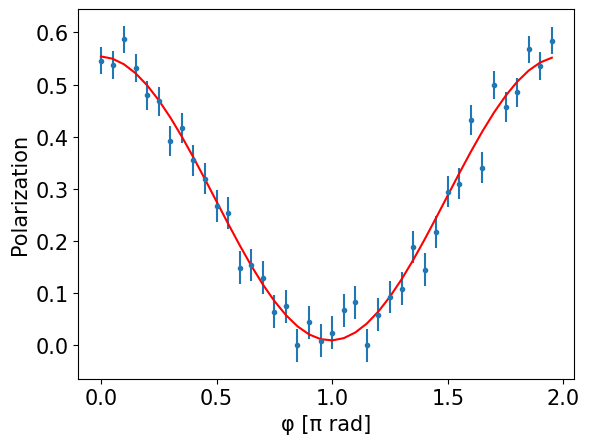

In [66]:
out = plotting(False)

f(x)=b⋅cos(x-a)+c
a=(0.347±0.008)π
b=(0.322±0.008)
c=(0.273±0.006)
|S|=(0.61±0.02)


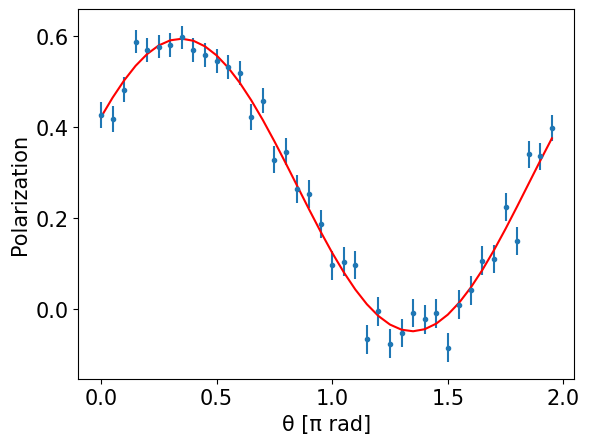

In [67]:
out = plotting(True)

In [68]:
# @title S = - 1

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array([-0.007,  0.011, -0.026 , 0.04 ,  0.013,  0.093 , 0.087 , 0.182 , 0.248 , 0.274,
  0.275 , 0.336 , 0.358 , 0.401 , 0.476 , 0.48 ,  0.472 , 0.55  , 0.641 , 0.574,
  0.619  ,0.573 , 0.507 , 0.534 , 0.513 , 0.452 , 0.436 , 0.426 , 0.349 , 0.39,
  0.306  ,0.238 , 0.19  , 0.203 , 0.145 , 0.112 , 0.051, -0.019 , 0.08  , 0.   ])

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th  = np.array(
[ 0.382,  0.387,  0.335,  0.293 , 0.225 , 0.223 , 0.138 , 0.092 , 0.066 , 0.042,
  0.011, -0.042, -0.031 ,-0.082 ,-0.08 , -0.029 , 0.02  ,-0.059 , 0.038 , 0.095,
  0.104,  0.061,  0.221 , 0.24  , 0.332 , 0.386 , 0.391 , 0.491 , 0.477 , 0.592,
  0.592 , 0.611,  0.596 , 0.623 , 0.6   , 0.642 , 0.57  , 0.564 , 0.504 , 0.48 ]
 )


f(x)=b⋅cos(x-a)+c
a=(1.002±0.008)π
b=(0.286±0.007)
c=(0.29±0.005)
argS=(1.002±0.008)π


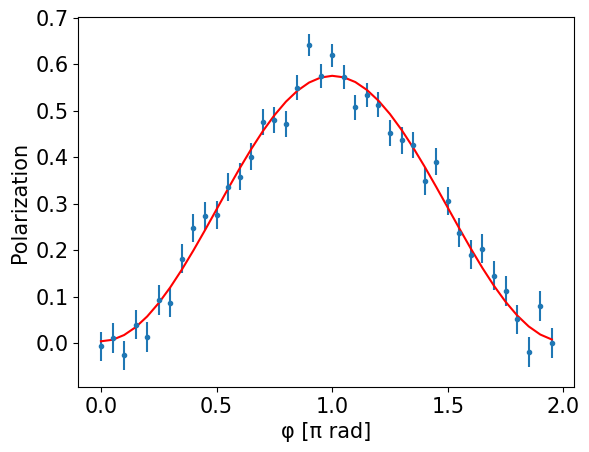

In [69]:
out = plotting()

f(x)=b⋅cos(x-a)+c
a=(-0.335±0.006)π
b=(0.336±0.007)
c=(0.278±0.005)
|S|=(0.58±0.01)


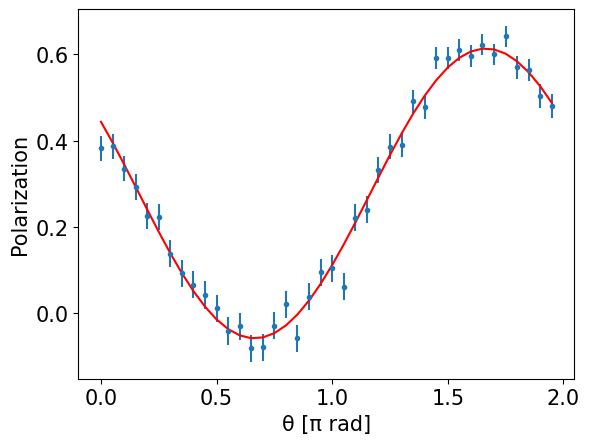

In [70]:
out = plotting(True)

In [71]:
# @title S = 0

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array([0.275, 0.307, 0.23,  0.286, 0.235, 0.267, 0.258 ,0.293, 0.291 ,0.248, 0.234, 0.311,
 0.26 , 0.251, 0.265, 0.273, 0.313, 0.269, 0.216, 0.315, 0.291 ,0.279, 0.271, 0.227,
 0.232, 0.22 , 0.227, 0.31 , 0.256, 0.275, 0.238, 0.303, 0.307 ,0.258, 0.256, 0.297,
 0.264, 0.275, 0.327, 0.299])

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array([ 0.709,  0.728  ,0.712,  0.661,  0.591  ,0.656,  0.546,  0.478  ,0.367 , 0.342,
  0.219,  0.177  ,0.186,  0.083 , 0.014 ,-0.099, -0.084, -0.108 ,-0.147 ,-0.109,
 -0.116, -0.106 ,-0.116, -0.072 ,-0.081, -0.059 , 0.04 ,  0.097 , 0.161 , 0.252,
  0.249 , 0.421,  0.424,  0.544 , 0.52 ,  0.622 , 0.637 , 0.678 , 0.662  ,0.698])

f(x)=b⋅cos(x-a)+c
a=(0.0±0.3)π
b=(0.008±0.007)
c=(0.27±0.005)
argS=(0.0±0.3)π


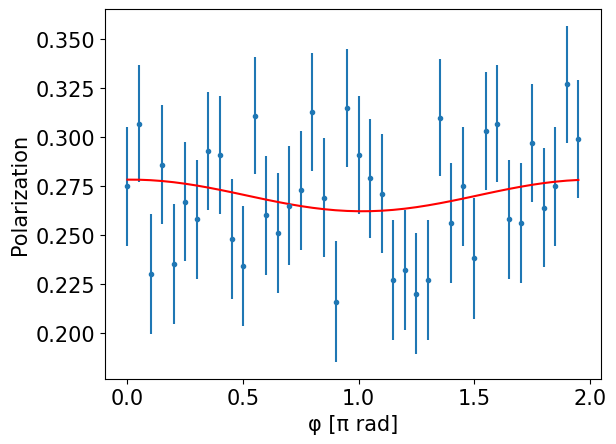

In [72]:
out = plotting()

f(x)=b⋅cos(x-a)+c
a=(-0.012±0.005)π
b=(0.434±0.007)
c=(0.284±0.005)
|S|=(0.019±0.008)


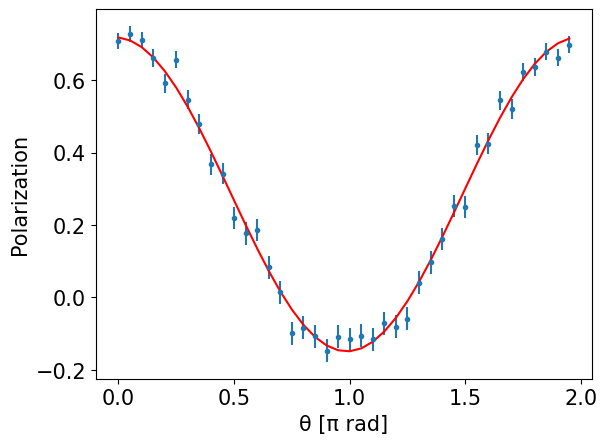

In [73]:
out = plotting(True)

## S-Matrix, Conditioning the Flavour of the Loop

In this experiment, we create a pair of topological charges of varying flavour and then apply a closed anyon loop of flavour that is conditioned on the state of a bit.
$$
    \ket{0} \rightarrow F^a_{s_1, s_2}\ket{GS} = \ket{s_1, s_2; a},
$$
 here $a$ labels the flavour of anyons created at sites $s_1$ and $s_2$.
 $$
     \frac{1}{\sqrt{2}}(\ket{c=0}+\ket{c=1})\ket{s_1, s_2; a} \rightarrow \frac
{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}\ket{0}(F^{0}_{\partial S}+F^{\tilde{0}}_{\partial S})\ket{s_1, s_2; a}+\ket{1}F^b_{\partial S}\ket{s_1, s_2; a}), 
$$
 here $0$, $\tilde{0}$ and $b$ label the flavours of the second anyon and $\partial S$ is a loop enclosing a set $S \ni s_1$ (and $s_2 \notin S$).

 The applied loop doesn't change the charge content of the state, hence we can factorize out the matter degrees of freedom:
$$
   \frac
{1}{\sqrt{2}}(\ket{0}(F^{0}_{\partial S}+F^{\tilde{0}}_{\partial S})\ket{s_1, s_2; a}+\ket{1}F^b_{\partial S}\ket{s_1, s_2; a}) = \frac
{1}{\sqrt{2}}(\ket{0}(S_{0a}+S_{\tilde{0}a})\ket{s_1, s_2; a}+\ket{1}S_{ba}\ket{s_1, s_2; a}) = \frac
{1}{\sqrt{2}}(\ket{0}(S_{0a}+S_{\tilde{0}a})+\ket{1}S_{ba})\ket{s_1, s_2; a} 
$$
 where $\tilde{S}_{xa}$ is the normalized linking matrix element for two anyon flavours, the value of which we extract by tomography given that we know $S_{0a} = \text{Tr} A_e^a = d_a $ and $S_{\tilde{0}a} = \text{Tr} A_{r^2}^a = \pm d_a$ (these can be measured with a simlified version of the previous protocol).

<span style="color:red">ToDo: Check the normalizations! They are not correct!</span>.

In [74]:
# @title S = + 1

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array(
[ 0.558 , 0.595,  0.499  ,0.565,  0.467  ,0.409,  0.419  ,0.262,  0.268  ,0.124,
  0.076, -0.053, -0.118 ,-0.159 ,-0.271 ,-0.324 ,-0.387 ,-0.457, -0.503 ,-0.49,
 -0.5  , -0.512 ,-0.429 ,-0.433 ,-0.349, -0.264 ,-0.298 ,-0.176, -0.081 , 0.055,
  0.081,  0.124 , 0.228,  0.305 , 0.36,   0.438 , 0.441,  0.513 , 0.553,  0.556]
)

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array(
[ 0.162,  0.204  ,0.209,  0.43   ,0.437,  0.464  ,0.52 ,  0.523  ,0.578,  0.576,
  0.569,  0.533 , 0.551 , 0.475 , 0.384 , 0.407 , 0.387 , 0.258 , 0.201 , 0.068,
 -0.026, -0.095, -0.158 ,-0.276 ,-0.307 ,-0.347 ,-0.387 ,-0.442 ,-0.491 ,-0.465,
 -0.49 , -0.401, -0.384 ,-0.407, -0.304 ,-0.278, -0.215 ,-0.115, -0.077 ,-0.001]
 )

f(x)=b⋅cos(x-a)+c
a=(-0.004±0.004)π
b=(0.531±0.007)
c=(0.052±0.005)
argS=(-0.004±0.004)π


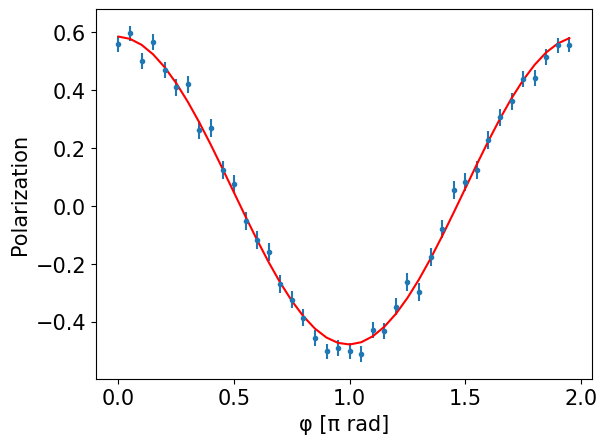

In [75]:
out = plotting()

f(x)=b⋅cos(x-a)+c
a=(0.463±0.004)π
b=(0.526±0.007)
c=(0.057±0.005)
|S|=(0.89±0.01)


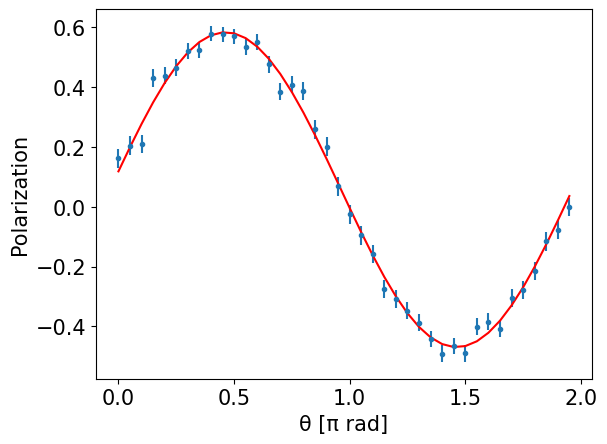

In [76]:
out = plotting(True)

In [77]:
# @title S = - 1

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array(
[-0.477, -0.49  ,-0.469, -0.422 ,-0.428, -0.293 ,-0.147, -0.202 ,-0.071, -0.06,
 -0.013,  0.095 , 0.202 , 0.287 , 0.38  , 0.411 , 0.463 , 0.52  , 0.558 , 0.565,
  0.575,  0.559 , 0.58  , 0.493 , 0.496 , 0.39  , 0.316 , 0.238 , 0.201 , 0.083,
  0.057, -0.011, -0.112 ,-0.204, -0.264 ,-0.269, -0.425 ,-0.406, -0.4   ,-0.402]
 )

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array(
[ 0.164,  0.016  ,0.004, -0.116 ,-0.236, -0.294 ,-0.309, -0.368 ,-0.411, -0.388,
 -0.416, -0.468 ,-0.485 ,-0.413 ,-0.403 ,-0.451 ,-0.27 , -0.285 ,-0.234, -0.104,
  0.006,  0.103 , 0.19  , 0.249 , 0.299 , 0.414 , 0.46  , 0.529 , 0.521 , 0.574,
  0.515 , 0.608,  0.544  ,0.505,  0.485  ,0.495,  0.381  ,0.339 , 0.256  ,0.237]
 )


f(x)=b⋅cos(x-a)+c
a=(0.998±0.005)π
b=(0.516±0.008)
c=(0.048±0.006)
argS=(0.998±0.005)π


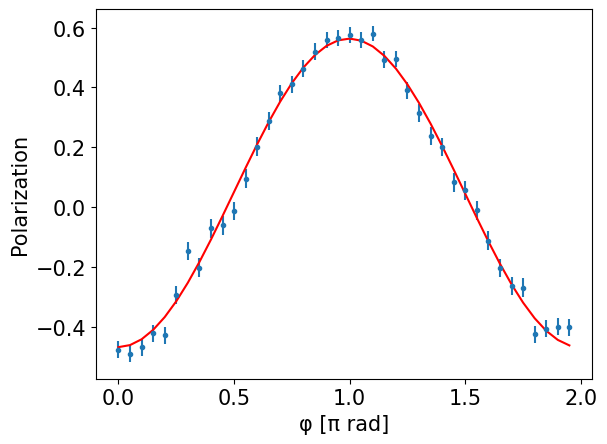

In [78]:
out = plotting()

f(x)=b⋅cos(x-a)+c
a=(1.54±0.005)π
b=(0.522±0.008)
c=(0.056±0.006)
|S|=(0.88±0.01)


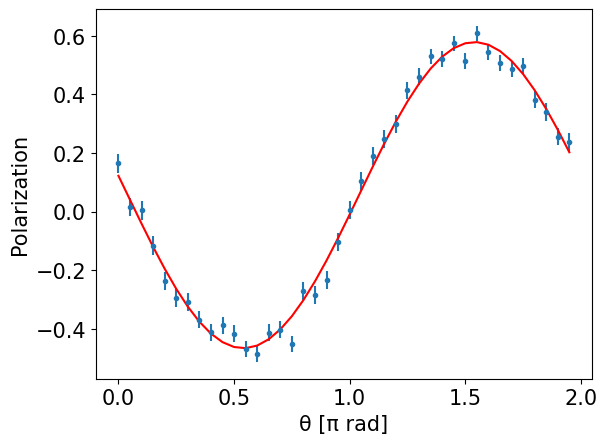

In [79]:
out = plotting(True)

In [82]:
# @title S = 0

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array(
[ 0.043,  0.083 , 0.008,  0.068  ,0.014,  0.115  ,0.037,  0.027  ,0.042,  0.103,
  0.049,  0.102 , 0.045, -0.009 , 0.082 , 0.115 , 0.027 , 0.033 , 0.07  , 0.009,
  0.032,  0.047 , 0.067 , 0.045 , 0.059 , 0.086 , 0.07  , 0.045 , 0.062 , 0.056,
  0.003 , 0.092,  0.028 ,-0.005,  0.075 , 0.046 , 0.08  , 0.019,  0.055 , 0.05 ]
 )

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array(
[ 0.278 , 0.305  ,0.293,  0.269  ,0.335,  0.253  ,0.207,  0.195  ,0.121 , 0.089,
  0.078 , 0.057 ,-0.004 ,-0.078 ,-0.132, -0.128 ,-0.19 , -0.167 ,-0.103 ,-0.219,
 -0.214 ,-0.216 ,-0.187 ,-0.194 ,-0.144, -0.068 ,-0.032, -0.106 , 0.019 ,-0.029,
  0.014  ,0.047,  0.128 , 0.197,  0.156 , 0.197,  0.284 , 0.318,  0.253  ,0.276]
 )

f(x)=b⋅cos(x-a)+c
a=(0.6±0.6)π
b=(0.004±0.007)
c=(0.052±0.005)
argS=(0.6±0.6)π


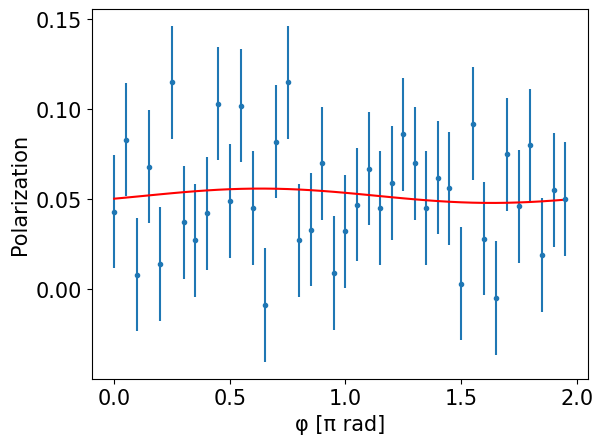

In [83]:
out = plotting()

f(x)=b⋅cos(x-a)+c
a=(0.01±0.01)π
b=(0.251±0.008)
c=(0.054±0.006)
|S|=(0.02±0.02)


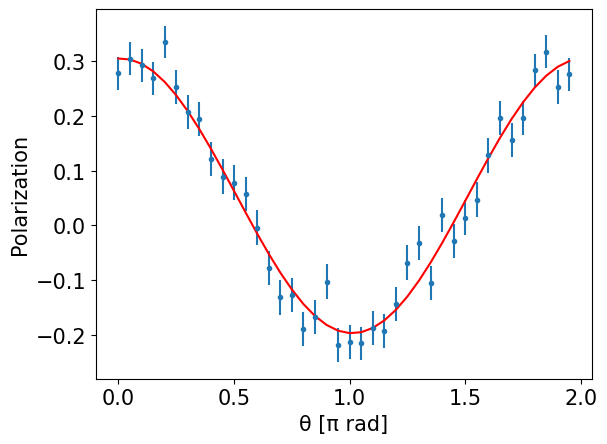

In [84]:
out = plotting(True)

## T-matrix

To measure the spin of the anyon ($T_{ab} = e^{i\phi_a}\delta_{ab}$) we hace set up an inteference protocol similar to the S-matrix protocols.

Main idea is to create two anyons between two sites $s_1$ and $s_2$ via two different paths, paths differ by one twist of the ribbon, $2\pi$ rotation of the anyon.

Which path is taken is conditioned on the control bit:
$$
\frac{1}{2}(\ket{c = 0} + \ket{c = 1})\ket{GS} \rightarrow \frac{1}{2}(\ket{0}F^a_{s_1, s_2; s}\ket{GS} + \ket{1}F^a_{s_1, s_2; t}\ket{GS}), 
$$
where $s$ and $t$ label the two path the anyons took.

Charge configuration again is the same, hence we can factorise the matter degrees of freedom leaving us with:
$$
\frac{1}{2}(\ket{0}F^a_{s_1, s_2; s}\ket{GS} + \ket{1}F^a_{s_1, s_2; t}\ket{GS}) = \frac{1}{2}(\ket{0}T^a_s\ket{s_1, s_2; a} + \ket{1}T^a_t\ket{s_1, s_2; a}) = \frac{1}{2}(\ket{0}T^a_s + \ket{1}T^a_t)\ket{s_1, s_2; a}, 
$$
the two path depended phases $T^a_{s/t}$ differ by the spin factor $T_{aa}$ is the two path differ by one twist in the ribbon. This difference in the two phases we can measure by means of tomography on the control bit after the process.

Moreover we can repeat the experiments for different choices of the paths (which differ by a twist) to explore the path independence of this relative phase.

In [87]:
# @title T = + j

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array(
[ 0.038, -0.041 ,-0.05,  -0.141 ,-0.221, -0.242 ,-0.26,  -0.316 ,-0.312, -0.345,
 -0.343, -0.38 , -0.328, -0.304 ,-0.235, -0.227 ,-0.193 ,-0.121 ,-0.071, -0.003,
  0.09 ,  0.063 , 0.179 , 0.248 , 0.287,  0.323 , 0.347 , 0.377 , 0.428,  0.456,
  0.441,  0.406,  0.421  ,0.385,  0.362 , 0.343 , 0.275 , 0.248 , 0.171 , 0.09 ]
)

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array(
[ 0.051, -0.013 ,-0.093, -0.132 ,-0.213, -0.252 ,-0.286, -0.348 ,-0.365, -0.298,
 -0.359 ,-0.364 ,-0.306 ,-0.305 ,-0.289 ,-0.234 ,-0.178 ,-0.124 ,-0.031 , 0.005,
  0.071 , 0.116 , 0.205 , 0.224 , 0.27  , 0.33 ,  0.353  ,0.369 , 0.438 , 0.452,
  0.435 , 0.413,  0.428 , 0.365,  0.345  ,0.269,  0.272  ,0.194 , 0.164 , 0.092]
 )


f(x)=b⋅cos(x-a)+c
a=(1.001±0.003)π
b=(0.485±0.005)
c=(0.042±0.003)
argS=(1.001±0.003)π


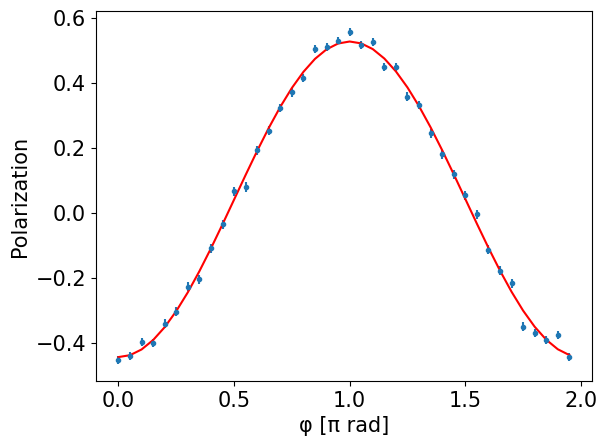

In [94]:
out = plotting(False, 5000)

f(x)=b⋅cos(x-a)+c
a=(1.512±0.003)π
b=(0.485±0.004)
c=(0.041±0.003)
|S|=(0.963±0.009)


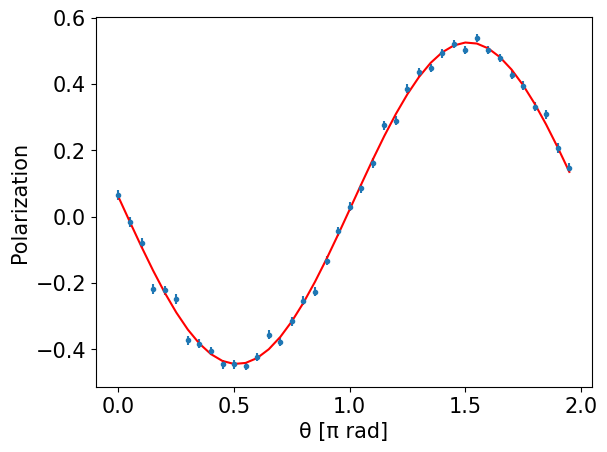

In [95]:
out = plotting(True, 5000)

In [90]:
# @title T = - 1

num_point = 40
angles_ph = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_ph = np.array(
[-0.451, -0.44 , -0.397, -0.399 ,-0.34,  -0.303 ,-0.227, -0.204 ,-0.108, -0.035,
  0.067,  0.08 ,  0.193 , 0.253 , 0.323,  0.371 , 0.414 , 0.503 , 0.51 ,  0.53,
  0.557,  0.516,  0.526  ,0.448 , 0.449 , 0.358 , 0.332 , 0.245 , 0.18  , 0.119,
  0.054 ,-0.004, -0.113 ,-0.178, -0.216 ,-0.349 ,-0.369 ,-0.39 , -0.375 ,-0.442]
 )

num_point = 40
angles_th = np.array([i*np.pi*2/num_point for i in range(num_point)])
pols_th = np.array(
[ 0.065, -0.016 ,-0.079, -0.218 ,-0.222, -0.248 ,-0.372, -0.383 ,-0.404, -0.445,
 -0.445, -0.449 ,-0.423 ,-0.355 ,-0.377, -0.315 ,-0.253 ,-0.226 ,-0.132 ,-0.044,
  0.03 ,  0.086 , 0.162 , 0.276 , 0.29 ,  0.386 , 0.435  ,0.448 , 0.492 , 0.522,
  0.503 , 0.539,  0.503 , 0.478,  0.428 , 0.395 , 0.331 , 0.309,  0.207  ,0.148]
 )


f(x)=b⋅cos(x-a)+c
a=(1.001±0.003)π
b=(0.485±0.005)
c=(0.042±0.003)
argS=(1.001±0.003)π


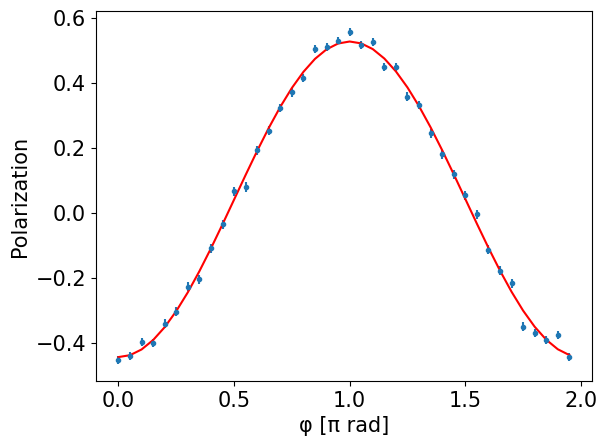

In [96]:
out = plotting(False, 5000)

f(x)=b⋅cos(x-a)+c
a=(1.512±0.003)π
b=(0.485±0.004)
c=(0.041±0.003)
|S|=(0.963±0.009)


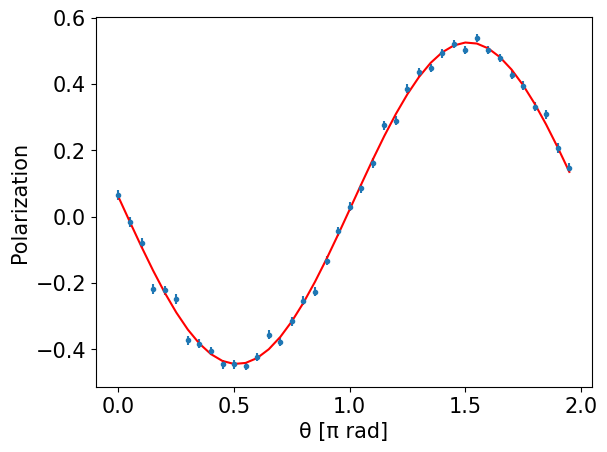

In [97]:
out = plotting(True, 5000)

## Ground State Preparation on Planar Graphs

### The Setup

The prohibitive depth of general multiplication circuit limits us on which graphs we are able to contrcut ground state.

Here, we will move away from the quasi-one-dimensional genometry we've been using up to now to something more involved

In [ ]:
full_table = np.array(
[[6843,  905, 1592,  216],
 [1940,  346, 1025,  195],
 [3883,  957, 1119,  227],
 [1849,  353, 1099,  196],
 [1852,  278,  760,  118],
 [ 959,  170,  619,  110],
 [1556,  301,  615,  112],
 [ 910,  155,  653,   87]]
)

In [ ]:
full_table = np.array(
[[4806, 1343, 1417,  656],
 [1916,  731, 1068,  566],
 [3471, 1366, 1256,  631],
 [1890,  765, 1092,  536],
 [1448,  428,  693,  293],
 [ 644,  259,  472,  210],
 [1222,  460,  605,  292],
 [ 597,  261,  405,  201]]
)

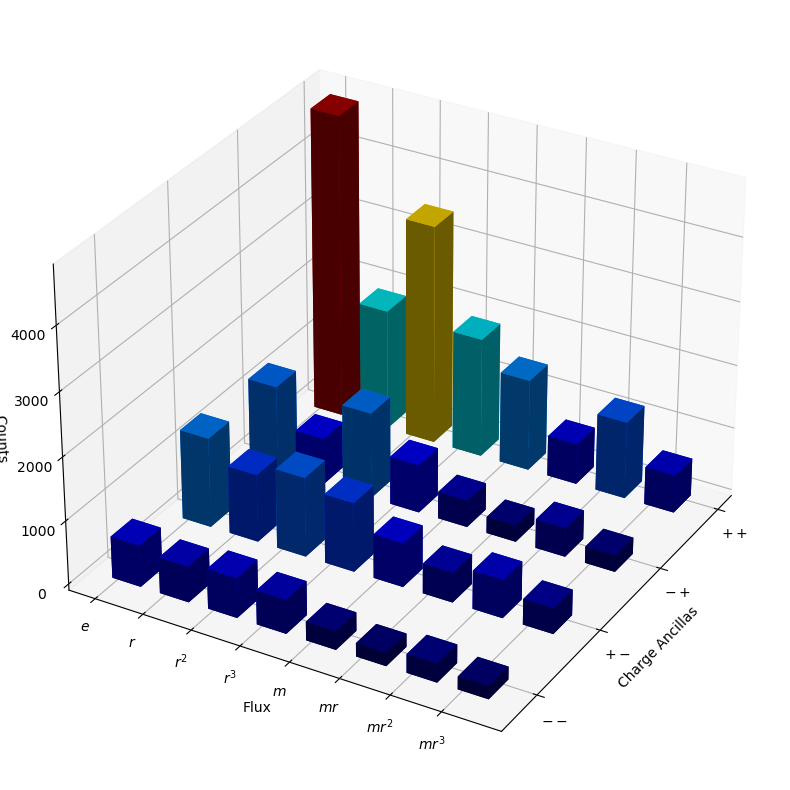

In [ ]:
#@title Plotting

from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm  
import itertools
import pandas as pd

results = (full_table.T).reshape([full_table.size])

g_lab = [r'$e$', r'$r$', r'$r^2$', r'$r^3$', r'$m$', r'$mr$', r'$mr^2$', r'$mr^3$']
charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
# charge_mmt_res = np.array([np.base_repr(i) for i in charge_mmt_res_num])
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index_pd = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index_pd)


x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,6800, r'$O$', (1,0,0), size= 20,
color='black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
#ax1.text(0,2-1/3,500, r'$\tilde{O}$', (1,0,0), size= 20,
#color='black',
#path_effects=[pe.withStroke(linewidth=4, foreground="white")])
#ax1.text(2,-1/3,500, r'$\Sigma_{m}$', (1,0,0), size= 20,
#color='black',
#path_effects=[pe.withStroke(linewidth=4, foreground="white")])
#ax1.text(2,2-1/3,500, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
#color='black',
#path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('fusion_r_mes.png', dpi=300)
plt.show()

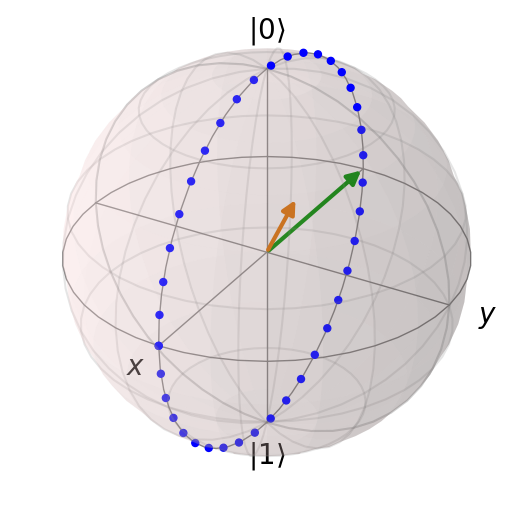

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([-1,0,0])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([c, z, s])

theta = 0.34*np.pi
phi = np.pi
amp = 0.34
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()

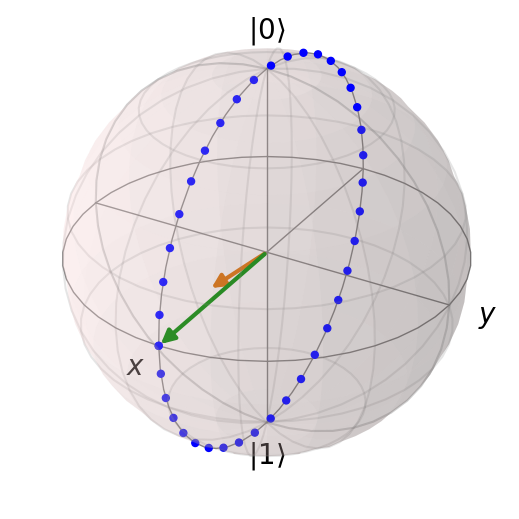

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([1,0,0])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([c, z, s])

theta = 0.46*np.pi
phi = 0
amp = 0.52/(1-0.056)
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()

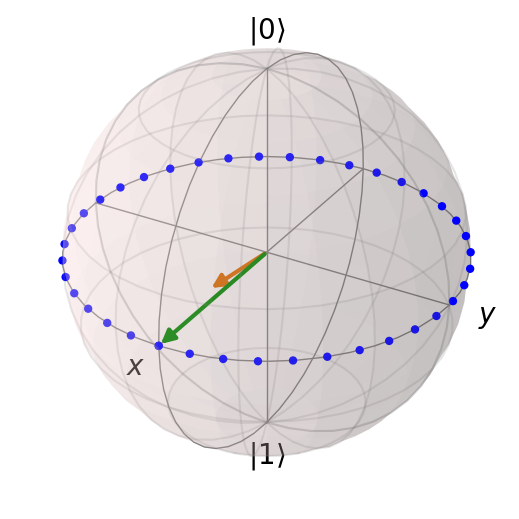

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([1,0,0])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([c, s, z])

theta = 0.46*np.pi
phi = 0
amp = 0.52/(1-0.056)
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()

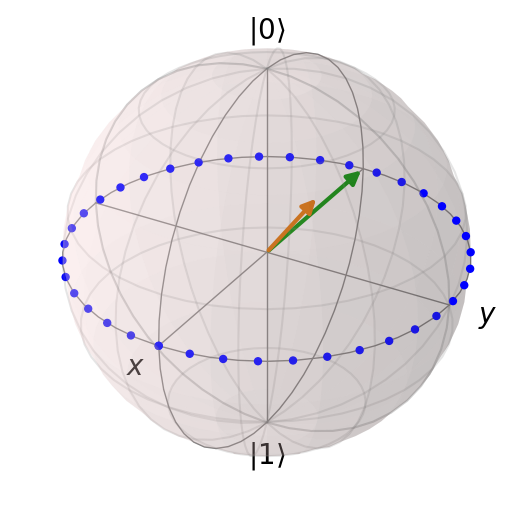

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([-1,0,0])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([c, s, z])

theta = 0.46*np.pi
phi = np.pi
amp = 0.52
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()

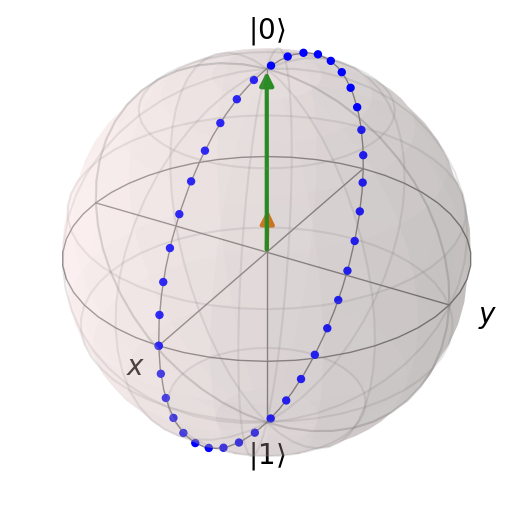

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([0,0,1])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([c, z, s])

theta = 0.011*np.pi
phi = np.pi
amp = 0.25
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()

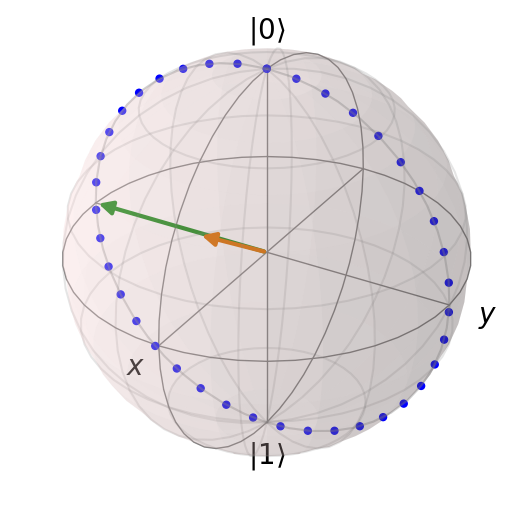

In [ ]:
import qutip

b = qutip.Bloch()
b.make_sphere()

b.add_vectors([0,-1,0])
th = np.linspace(0, 2*np.pi, 40)
c = np.cos(th)
s = np.sin(th)
z = np.zeros(40)
b.add_points([z, s, c])

theta = 0.51*np.pi
phi = 1.5*np.pi
amp = 0.39
mmt = [amp*np.sin(theta)*np.cos(phi), amp*np.sin(theta)*np.sin(phi), amp*np.cos(theta)]
b.add_vectors(mmt)

b.render()
b.show()